In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
%autosave 0 

Autosave disabled


In [14]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [15]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [16]:
only_nice=True
data=pd.read_csv('lecturasconodometria.txt')


cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas

if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3






####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]


data.describe()


,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R714,R715,R716,R717,R718,R719,R720,x,y,theta
count,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,...,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000
mean,3.359770,3.361873,3.359525,3.365355,3.372117,3.377027,3.376309,3.379349,3.389191,3.393477,...,3.629227,3.628952,3.636077,3.629775,3.635788,3.642282,3.643780,0.474876,0.457221,-0.113440
std,2.099933,2.103343,2.103897,2.109904,2.117552,2.119504,2.120335,2.125302,2.130151,2.132400,...,2.331853,2.331921,2.337438,2.333186,2.335148,2.340472,2.336713,2.009028,0.497757,1.982905
min,0.435912,0.434510,0.432887,0.431534,0.430204,0.428897,0.428586,0.426076,0.424837,0.423619,...,0.251262,0.252581,0.253922,0.255287,0.256599,0.257972,0.259369,-3.587735,-0.130961,-3.141290
25%,1.675508,1.671137,1.666525,1.663512,1.660460,1.658057,1.654113,1.649741,1.648988,1.645001,...,1.649592,1.651109,1.651642,1.653445,1.656365,1.658857,1.660059,-0.921340,0.151473,-2.594343
50%,2.637022,2.638902,2.632085,2.643567,2.651316,2.655378,2.655087,2.664712,2.673134,2.682876,...,2.765880,2.769057,2.775006,2.769103,2.788009,2.784558,2.801169,0.838595,0.301476,0.122279
75%,4.755706,4.753299,4.765337,4.777165,4.785247,4.806156,4.811645,4.795866,4.833402,4.875470,...,5.605645,5.609724,5.616324,5.602028,5.605524,5.615700,5.632298,2.026029,0.682428,1.451075
max,9.018440,9.031508,9.040556,9.012540,9.025507,9.035414,9.009221,9.022154,9.030491,9.004526,...,9.310540,9.332047,9.348527,9.365735,9.387755,9.413424,9.436586,3.749774,3.865329,3.141516


In [23]:
fast_load=True
get_new_ccs= False


if fast_load:
    datamugroso=pd.read_csv('pddata.csv')
    data= datamugroso.iloc[:13000,1:]
    
else:
    if get_new_ccs:

        K_corpus=1500
        N=100

        kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                          n_init=10, max_no_improvement=10, verbose=0)
        kmedias.fit(lecs)
        ccvk=kmedias.cluster_centers_
        mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                          n_init=10, max_no_improvement=10, verbose=0)
        mbk.fit(xyth)
        ccxyth=mbk.cluster_centers_
    else:
        ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
        print("CUANTIZANDO SIN RECALCULAR CC")
    aus=[]
    auvks=[]
    for i,lec in zip(xyth.values, lecs.values):
        _, au= quantized(i , ccxyth)
        aus.append(au)

        auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
        auvks.append(auvk)
    print(i ,au)
    data['Y']=aus
    data['Vk']=auvks
    obs,est= data['Vk'].values,data['Y'].values
    np.save('obs.npy',obs)
    np.save('est.npy',est)
    np.save ('ccxyth.npy',ccxyth)
    np.save ('ccvk.npy',ccvk)
    data.to_csv('pddata.csv')    
    print('new obs/ est almacenados')
    data['Y'].describe()   
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R716,R717,R718,R719,R720,x,y,theta,Y,Vk
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,...,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,3.387413,3.388261,3.383989,3.386556,3.394074,3.397028,3.393739,3.397158,3.404876,3.408355,...,3.659081,3.653163,3.657762,3.666290,3.665806,0.772975,0.443180,-0.149974,3.310231,659.262692
std,2.136605,2.139789,2.140846,2.145031,2.154263,2.154085,2.153782,2.159520,2.162855,2.165611,...,2.320935,2.317031,2.319089,2.325015,2.320092,1.974190,0.360502,1.973691,2.200047,398.524301
min,0.435912,0.434510,0.432887,0.431534,0.430204,0.428897,0.428586,0.426076,0.424837,0.423619,...,0.433910,0.435507,0.439195,0.438088,0.439763,-3.587735,-0.130961,-3.141290,0.000000,24.000000
25%,1.662427,1.658761,1.651282,1.649301,1.645320,1.643757,1.638794,1.634365,1.633089,1.627513,...,1.681693,1.683174,1.684239,1.686629,1.687770,-0.192108,0.177132,-2.595014,1.000000,303.000000
50%,2.582494,2.581457,2.573797,2.581656,2.582773,2.594208,2.592848,2.600070,2.611988,2.622249,...,2.877362,2.871153,2.881315,2.884924,2.892054,1.153960,0.335831,0.125133,3.000000,577.000000
75%,4.821970,4.807822,4.806420,4.816926,4.833722,4.850451,4.850525,4.860300,4.889861,4.930525,...,5.579594,5.559503,5.572615,5.582180,5.597586,2.314745,0.703569,1.371344,5.000000,1056.000000
max,9.018440,9.031508,9.040556,9.012540,9.025507,9.035414,9.009221,9.022154,9.030491,9.004526,...,9.348527,9.365735,9.387755,9.413424,9.436586,3.749774,1.344648,3.141516,7.000000,1479.000000


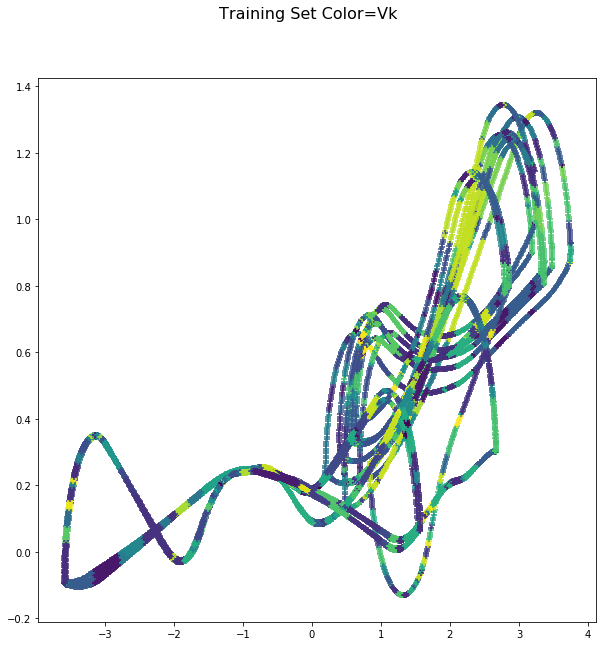

In [24]:
data_s=data#.iloc[1001:2000,:]

fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Color=Vk', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data_s.x, y=data_s.y,marker='+',c=data_s.Vk)


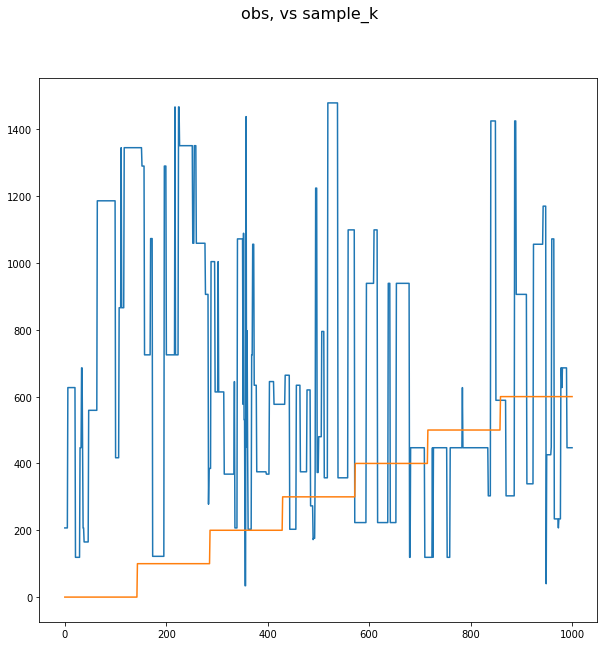

In [25]:
obs_s=obs[:1000]
est_s=np.ones(obs_s.shape)
for i in range(len(est_s)):
    est_s[i]= int(i/(len(est_s)/7            )   )


fig = plt.figure(figsize=(10,10))
fig.suptitle('obs, vs sample_k', fontsize=16)
ax1 = fig.add_subplot(111)
ax1.plot(np.linspace(0,len(obs_s),num=len(obs_s)),obs_s       )
ax1.plot(np.linspace(0,len(obs_s),num=len(obs_s)),est_s *100      )


In [26]:
data_s

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R716,R717,R718,R719,R720,x,y,theta,Y,Vk
0,2.208487,2.214837,2.221299,2.227875,2.234565,2.241374,2.248300,2.255346,2.262514,2.269805,...,4.636539,7.834864,7.831544,7.828493,7.825711,3.230296,1.145155,2.554403,4,207
1,2.235402,2.242092,2.248899,2.255825,2.262871,2.270038,2.277329,2.284744,2.292287,2.299958,...,7.831219,7.828393,7.825834,7.823543,7.821520,3.223964,1.149565,2.570661,4,207
2,2.263432,2.270478,2.277646,2.284937,2.292353,2.299896,2.307568,2.315370,2.323304,2.331372,...,7.826231,7.824122,7.822281,7.820706,7.819398,3.216884,1.153924,2.586603,4,207
3,2.294336,2.301775,2.309341,2.317037,2.324863,2.332823,2.340916,2.349146,2.357515,2.366025,...,7.822832,7.821505,7.820443,7.819649,7.819120,3.209675,1.158389,2.603681,4,207
4,2.323826,2.331642,2.339591,2.347674,2.355893,2.364252,2.372751,2.381392,2.390178,2.399111,...,7.821588,7.820976,7.820630,7.820549,4.627016,3.202996,1.162371,2.619348,4,207
5,2.355349,2.363569,2.371929,2.380429,2.389071,2.397858,2.406793,2.415877,2.425112,2.434501,...,7.822191,7.822313,4.629899,5.048106,1.339982,3.196053,1.166367,2.635456,4,207
6,2.388031,2.396673,2.405460,2.414394,2.423478,2.432713,2.442102,2.423785,2.402998,2.382644,...,7.824806,5.048904,7.826826,1.333134,1.330385,3.188999,1.170226,2.651871,4,627
7,2.423049,2.432146,2.441394,2.445996,2.424709,2.403871,2.383468,2.363488,2.343919,2.324750,...,7.829409,1.336569,1.332416,1.333018,1.339445,3.181707,1.174037,2.668428,4,627
8,2.448974,2.427595,2.406668,2.386179,2.366117,2.346467,2.327220,2.308364,2.289888,2.271783,...,1.334811,1.333946,1.337732,1.752277,1.752673,3.174667,1.177781,2.684110,4,627
9,2.389029,2.368883,2.349153,2.329827,2.310895,2.292346,2.274168,2.256353,2.238891,2.221771,...,1.337586,1.754217,1.754119,7.853936,7.857839,3.167475,1.181319,2.700229,4,627


In [27]:

obs,est=obs_s.astype(int),est_s.astype(int)

In [28]:
####BAUM WELCH APPROX###############???!?!?!


N=est.max()+1 
K_corpus= obs.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)
Modelo2= HMM(A,B,PI)
Modelo2.B=B+.0000001
Modelo2.A=A+.0000001




#np.linalg.norm(Modelo1.A-Modelo2.A)
np.save('A.npy',Modelo1.A)
np.save('B.npy',Modelo1.B)
np.save('PI.npy',Modelo1.PI)

A.shape

(7, 7)

In [29]:
A

array([[0.99300699, 0.00699301, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.99300699, 0.00699301, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.99300699, 0.00699301, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99300699, 0.00699301,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99300699,
        0.00699301, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.99300699, 0.00704225],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [30]:
B

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:

xyth.describe()

,x,y,theta
count,16701.000000,16701.000000,16701.000000
mean,0.474876,0.457221,-0.113440
std,2.009028,0.497757,1.982905
min,-3.587735,-0.130961,-3.141290
25%,-0.921340,0.151473,-2.594343
50%,0.838595,0.301476,0.122279
75%,2.026029,0.682428,1.451075
max,3.749774,3.865329,3.141516


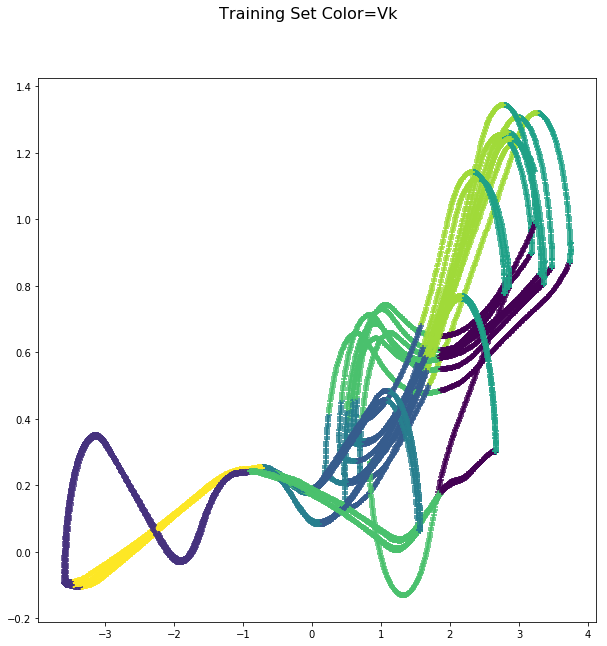

In [33]:
data_s=data#.iloc[1001:2000,:]

fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Color=Vk', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data_s.x, y=data_s.y,marker='+',c=data_s.Y)


In [41]:
ccxyth-.5 

array([[-2.11878917e+00, -3.21334146e-01, -5.26323951e-01],
       [ 2.53235873e+00,  3.66603972e-01,  1.17626176e+00],
       [ 9.48064172e-01,  8.95581692e-02, -3.23862909e+00],
       [ 9.57708572e-01, -1.19307358e-01, -3.36166549e-01],
       [-3.93438760e-03, -1.62942830e-01,  1.77078040e+00],
       [-1.48225250e+00,  2.39366135e+00,  1.81589124e+00],
       [-2.55975811e+00, -4.06952523e-01, -3.51023955e+00],
       [-4.01081274e+00, -4.82296066e-01,  1.21566442e+00]])

In [39]:
ccxyth+.5


array([[-1.11878917,  0.67866585,  0.47367605],
       [ 3.53235873,  1.36660397,  2.17626176],
       [ 1.94806417,  1.08955817, -2.23862909],
       [ 1.95770857,  0.88069264,  0.66383345],
       [ 0.99606561,  0.83705717,  2.7707804 ],
       [-0.4822525 ,  3.39366135,  2.81589124],
       [-1.55975811,  0.59304748, -2.51023955],
       [-3.01081274,  0.51770393,  2.21566442]])